# Data Science in Finance and Insurance - Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;

# Feature Selection

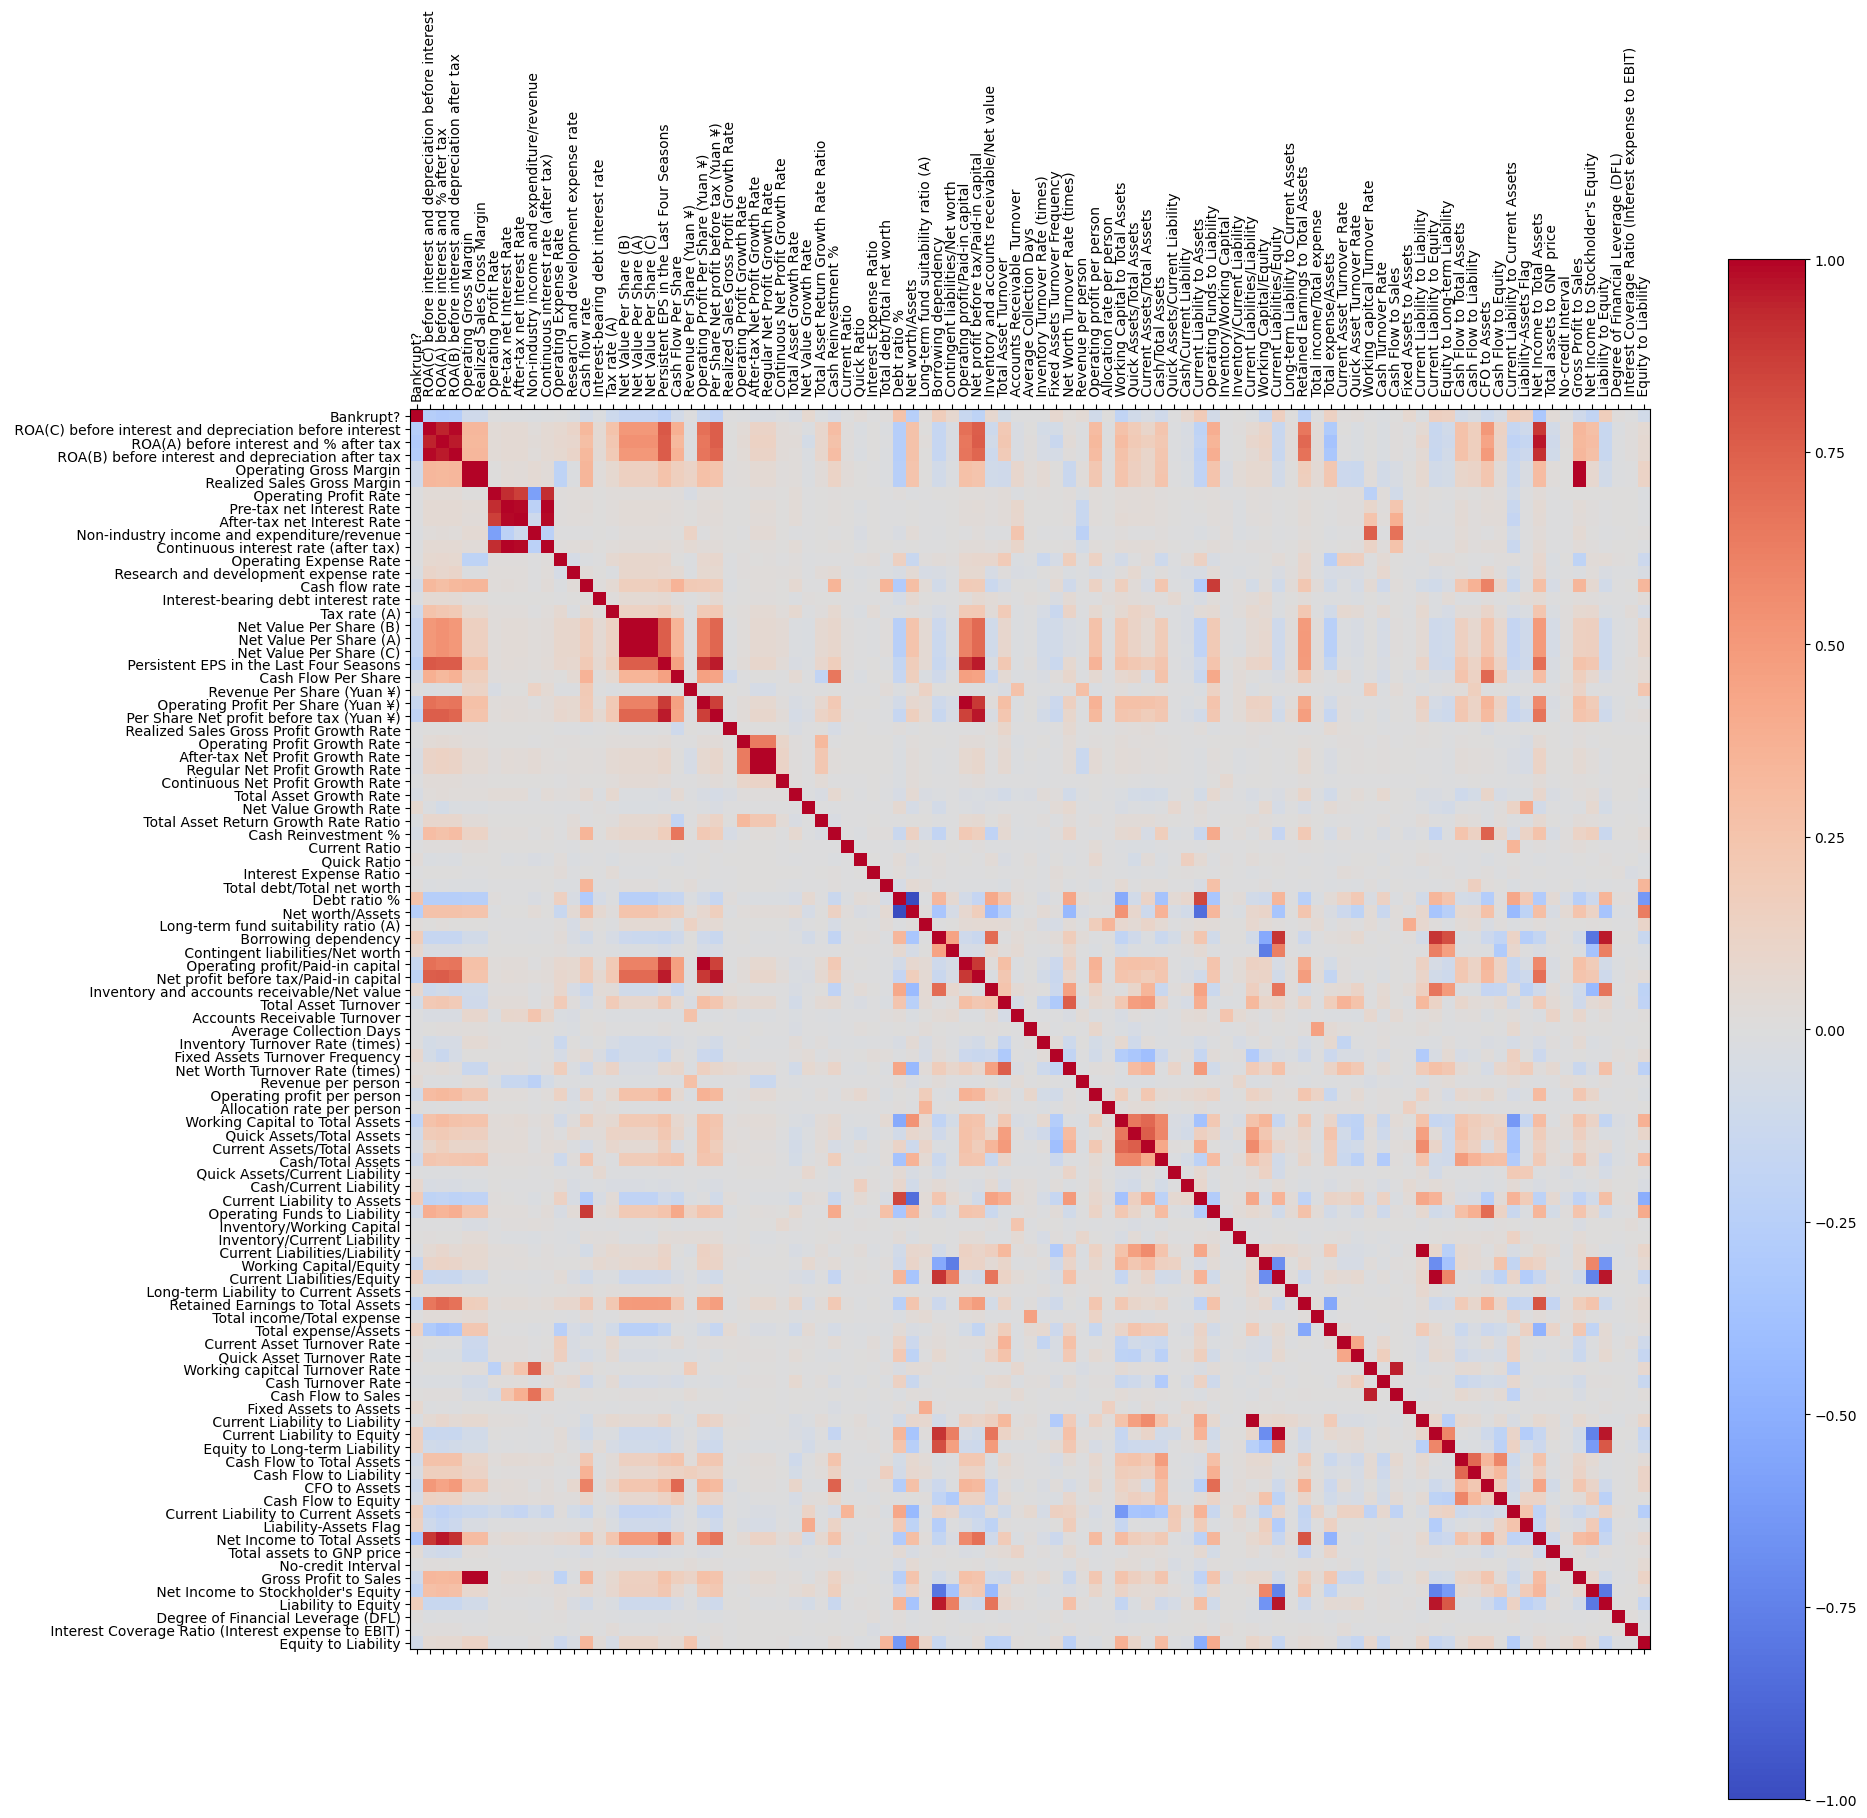

In [3]:
bdata = pd.read_csv("data.csv")

#Var[X_{Net Income Flag}] = 0, drop it
bdata = bdata.drop([' Net Income Flag'], axis = 1)

#Correlation Matrix
corrMat = bdata.corr()

#create color
fig,ax = plt.subplots(1,1, figsize = (20, 20))
cax = ax.matshow(corrMat, interpolation = 'nearest', cmap = "coolwarm")
fig.colorbar(cax)

list_cols = list(bdata.columns.values)
ax.set_xticks([i for i in range(len(list_cols))], labels = list_cols)
ax.set_yticks([i for i in range(len(list_cols))], labels = list_cols)
ax.tick_params(axis = 'x', labelrotation = 90)

plt.show()

In [4]:
# Find variables most correlated with Bankruptcy
bankCorr = corrMat['Bankrupt?'].sort_values(ascending = True)

negbankCorr = bankCorr[0:10]

posbankCorr = bankCorr[len(bankCorr) - 11:len(bankCorr) - 1]

negbankCorr

 Net Income to Total Assets                                -0.315457
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(C) before interest and depreciation before interest   -0.260807
 Net worth/Assets                                          -0.250161
 Persistent EPS in the Last Four Seasons                   -0.219560
 Retained Earnings to Total Assets                         -0.217779
 Net profit before tax/Paid-in capital                     -0.207857
 Per Share Net profit before tax (Yuan ¥)                  -0.201395
 Working Capital to Total Assets                           -0.193083
Name: Bankrupt?, dtype: float64

In [5]:
posbankCorr

 Equity to Long-term Liability          0.139014
 Total expense/Assets                   0.139049
 Liability-Assets Flag                  0.139212
 Current Liability to Equity            0.153828
 Current Liabilities/Equity             0.153828
 Liability to Equity                    0.166812
 Current Liability to Current Assets    0.171306
 Borrowing dependency                   0.176543
 Current Liability to Assets            0.194494
 Debt ratio %                           0.250161
Name: Bankrupt?, dtype: float64

In [6]:
#Create correlation matrix out of just those variables
highCorrfeatures = np.append(negbankCorr.index.values, posbankCorr.index.values)
corrdata = bdata[highCorrfeatures]

corrdataMat = corrdata.corr()

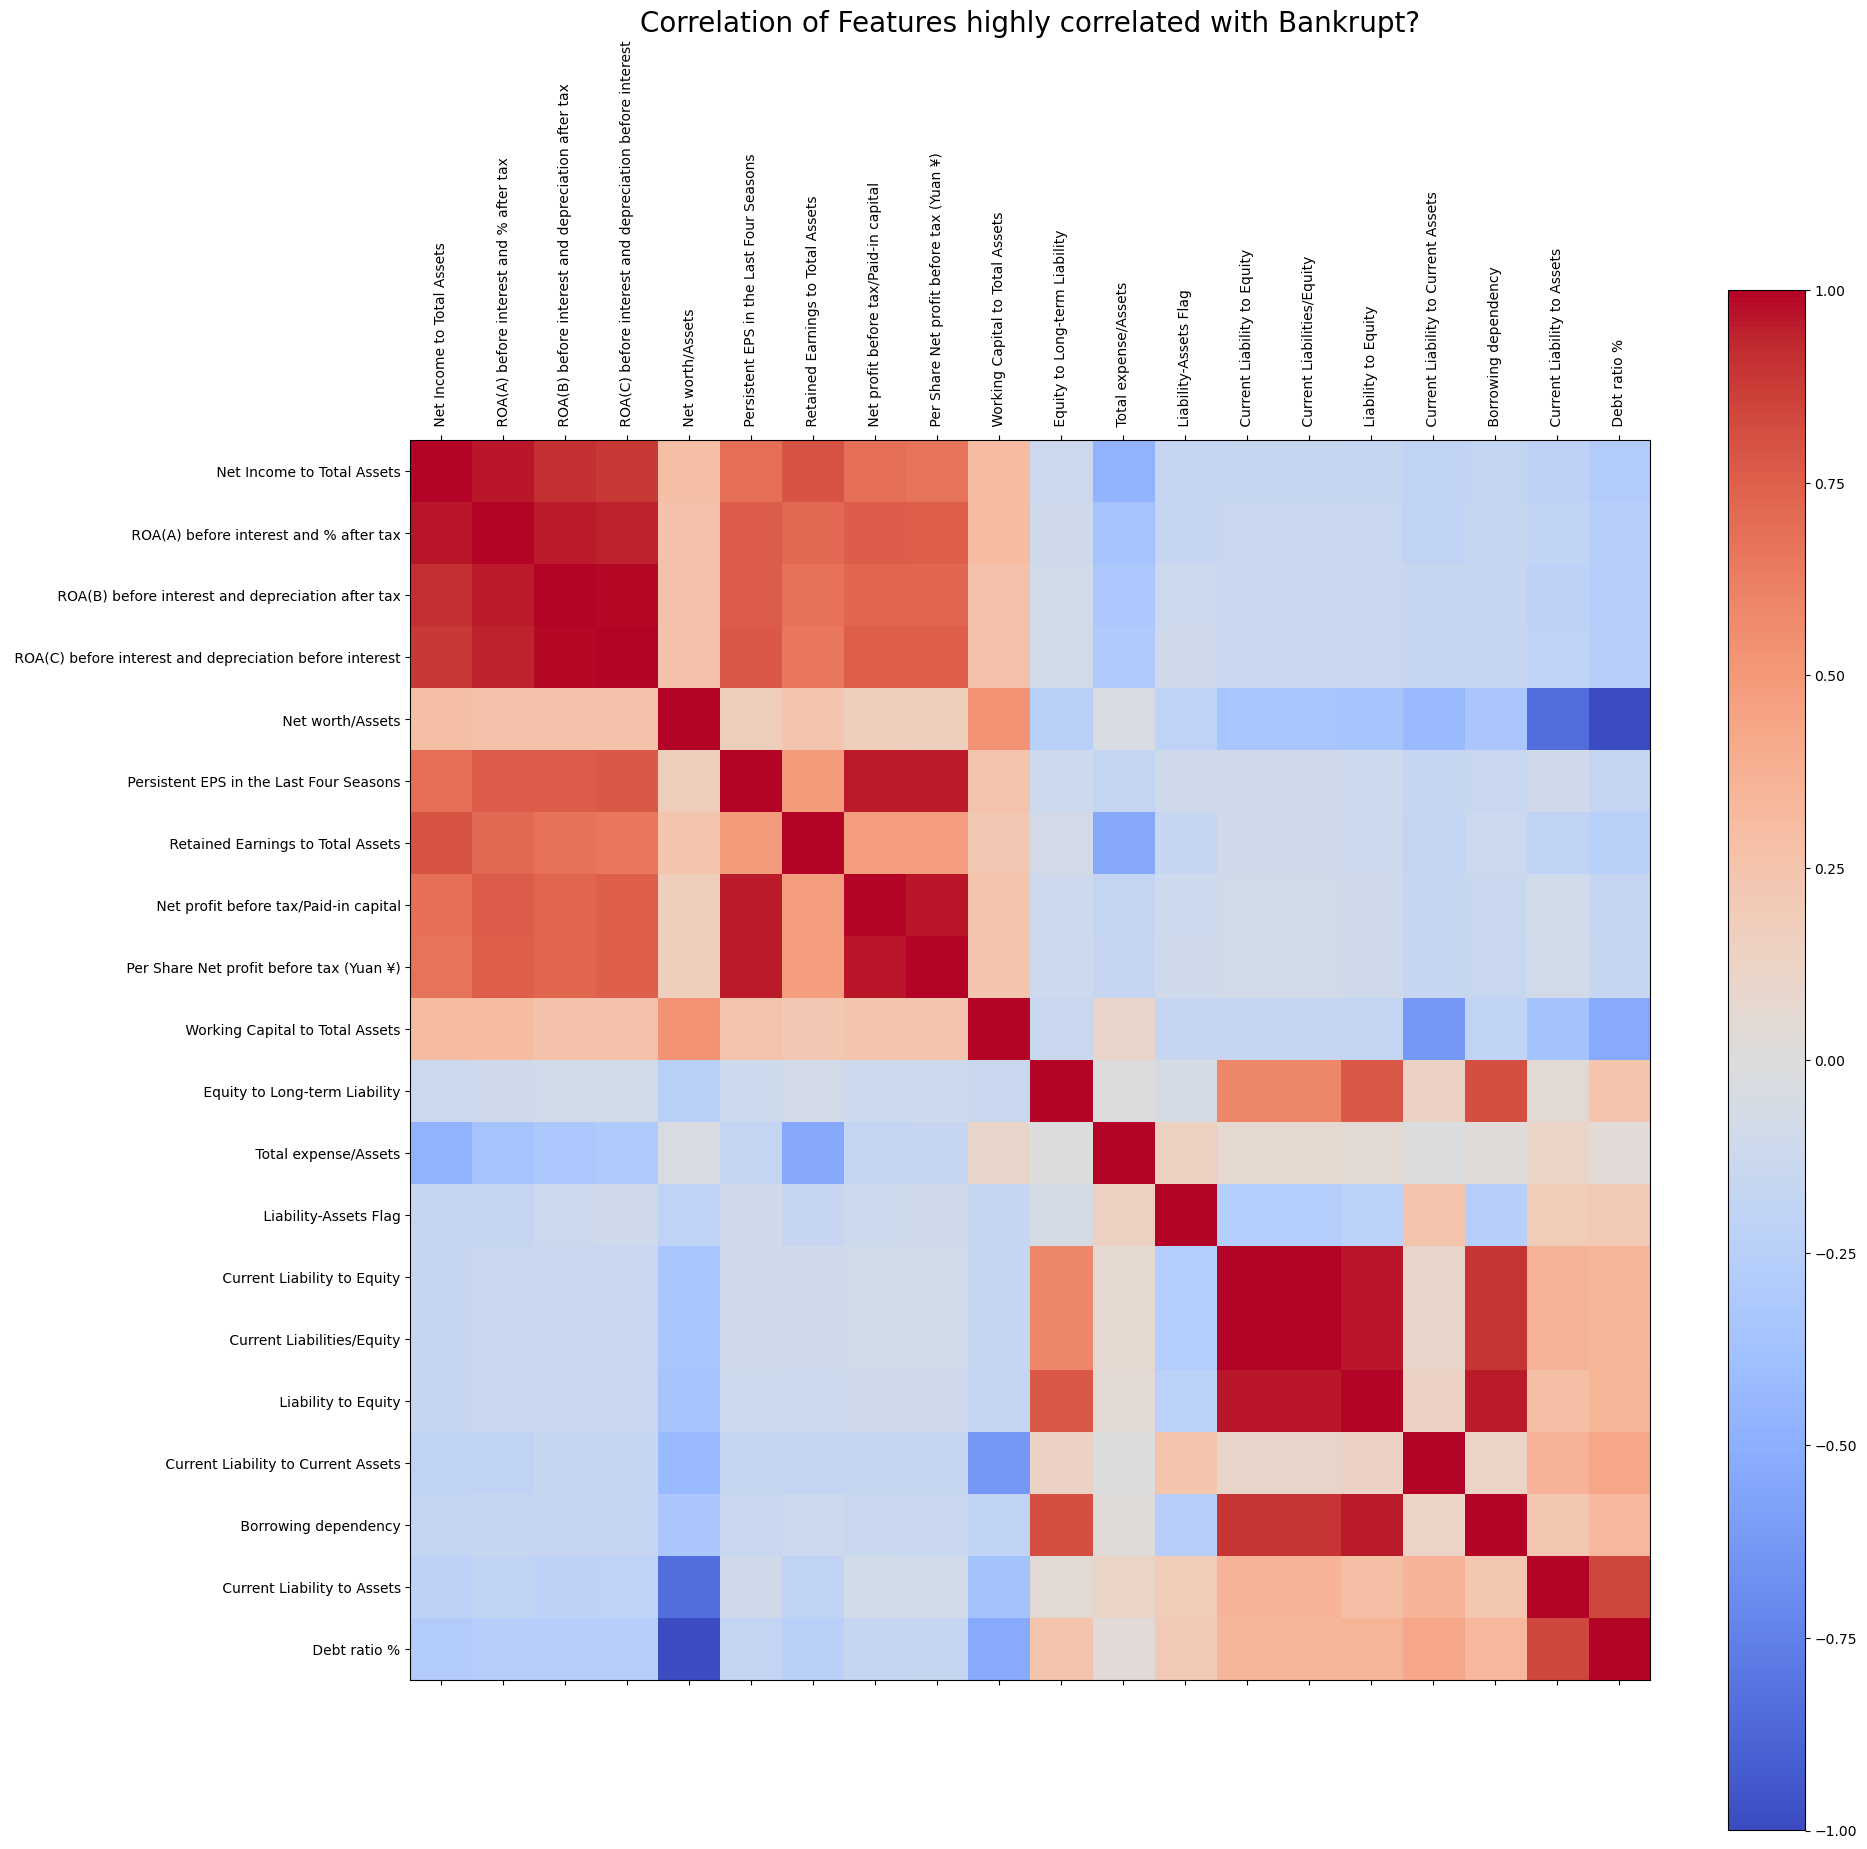

In [7]:
#Plot said matrix
#create color
fig2,ax2 = plt.subplots(1,1, figsize = (20, 20))
cax2 = ax2.matshow(corrdataMat, interpolation = 'nearest', cmap = "coolwarm")
fig2.colorbar(cax2)

list_cols2 = list(corrdata.columns.values)
ax2.set_xticks([i for i in range(len(list_cols2))], labels = list_cols2)
ax2.set_yticks([i for i in range(len(list_cols2))], labels = list_cols2)
ax2.tick_params(axis = 'x', labelrotation = 90)
ax2.set_title("Correlation of Features highly correlated with Bankrupt?", size = 20)

plt.show()

In [8]:
bdata.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [9]:
print(corrMat)

                                                    Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Net Income to Stockholder's Equity                 -0.180987   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807      

In [46]:
X = bdata.drop('Bankrupt?', axis=1)
y = bdata['Bankrupt?']
bdata.reset_index(drop=True, inplace=True)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Create and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate the classifier on the test set
accuracy = gnb.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.06451612903225806


In [50]:
#Split the unique classes equally to train and test sets

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Get the unique classes in your labels
unique_classes = np.unique(y)

# Reset the index of the DataFrame
bdata.reset_index(drop=True, inplace=True)

# Initialize empty lists to store the training and test sets
X_train, X_test, y_train, y_test = [], [], [], []

# Iterate over each class
for cls in unique_classes:
    # Get indices of samples for the current class
    indices = np.where(y == cls)[0]

    # Split the indices into training and test sets
    train_indices, test_indices = train_test_split(indices, random_state=0)

    # Append the corresponding samples to the training and test sets
    X_train.append(X.loc[train_indices])
    X_test.append(X.loc[test_indices])
    y_train.append(y.loc[train_indices])
    y_test.append(y.loc[test_indices])

# Concatenate the lists to create DataFrames
X_train, X_test, y_train, y_test = pd.concat(X_train), pd.concat(X_test), pd.concat(y_train), pd.concat(y_test)

# Create and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate the classifier on the test set
accuracy = gnb.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.06041055718475073
